RNN->순차데이터기반(텍스트,시계열), Transfer

In [1]:
from tensorflow.keras.datasets.imdb import load_data
(x_data,y_data),(tt_x,tt_y) = load_data(num_words = 500) # 단어종류가 500개
x_data.shape

17473536/17464789 [==============================] - 2s 0us/step


(25000,)

In [3]:
len(x_data[0]),len(x_data[1])

(218, 189)

In [4]:
y_data[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y = train_test_split(x_data,y_data,test_size=0.2, random_state=42)#validation 일반적으로 8:2

In [6]:
import numpy as np
l = np.array([len(i) for i in t_x])
l

array([259, 520, 290, ..., 300,  70,  77])

(array([1.1149e+04, 5.7490e+03, 1.8590e+03, 7.3200e+02, 3.0600e+02,
        1.8800e+02, 6.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([  11. ,  195.3,  379.6,  563.9,  748.2,  932.5, 1116.8, 1301.1,
        1485.4, 1669.7, 1854. ]),
 <BarContainer object of 10 artists>)

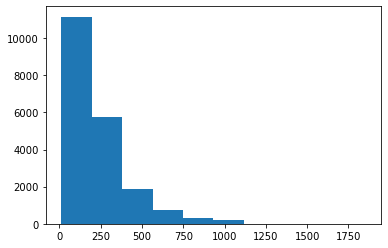

In [7]:
import matplotlib.pyplot as plt
plt.hist(l)

In [8]:
np.median(l)

178.0

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
s_t_x = pad_sequences(t_x, maxlen = 100)    

In [10]:
s_t_x.shape # 20000 100

(20000, 100)

In [12]:
s_t_x[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

In [13]:
t_x[0]

[1,
 73,
 89,
 81,
 25,
 60,
 2,
 6,
 20,
 141,
 17,
 14,
 31,
 127,
 12,
 60,
 28,
 2,
 2,
 66,
 45,
 6,
 20,
 15,
 497,
 8,
 79,
 17,
 491,
 8,
 112,
 6,
 2,
 20,
 17,
 2,
 2,
 4,
 436,
 20,
 9,
 2,
 6,
 2,
 7,
 493,
 2,
 6,
 185,
 250,
 24,
 55,
 2,
 5,
 23,
 350,
 7,
 15,
 82,
 24,
 15,
 2,
 66,
 10,
 10,
 45,
 2,
 15,
 4,
 20,
 2,
 8,
 30,
 17,
 2,
 5,
 2,
 17,
 2,
 190,
 4,
 20,
 9,
 43,
 32,
 99,
 2,
 18,
 15,
 8,
 157,
 46,
 17,
 2,
 4,
 2,
 5,
 2,
 9,
 32,
 2,
 5,
 2,
 267,
 17,
 73,
 17,
 2,
 36,
 26,
 400,
 43,
 2,
 83,
 4,
 2,
 247,
 74,
 83,
 4,
 250,
 2,
 82,
 4,
 96,
 4,
 250,
 2,
 8,
 32,
 4,
 2,
 9,
 184,
 2,
 13,
 384,
 48,
 14,
 16,
 147,
 2,
 59,
 62,
 69,
 2,
 12,
 46,
 50,
 9,
 53,
 2,
 74,
 2,
 11,
 14,
 31,
 151,
 10,
 10,
 4,
 20,
 9,
 2,
 364,
 352,
 5,
 45,
 6,
 2,
 2,
 33,
 269,
 8,
 2,
 142,
 2,
 5,
 2,
 17,
 73,
 17,
 204,
 5,
 2,
 19,
 55,
 2,
 2,
 92,
 66,
 104,
 14,
 20,
 93,
 76,
 2,
 151,
 33,
 4,
 58,
 12,
 188,
 2,
 151,
 12,
 215,
 69,
 224,
 142,


In [14]:
s_v_x = pad_sequences(v_x, maxlen = 100)

In [17]:
from tensorflow import keras
m = keras.Sequential()

In [18]:
m.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
m.add(keras.layers.Dense(1, activation='sigmoid')) # 이진분류 하나로분류 0,1이어도 하나로 표현.

In [19]:
t_ho = keras.utils.to_categorical(s_t_x) # 원리공부

In [21]:
t_ho.shape

(20000, 100, 500)

In [22]:
v_ho = keras.utils.to_categorical(s_v_x)

In [23]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [24]:
ot = keras.optimizers.RMSprop(learning_rate=1e-4) #1e-4?
m.compile(optimizer=ot, loss='binary_crossentropy', metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2.h5',
                                       save_best_only=True)
e_stopping = keras.callbacks.EarlyStopping(patience=3,
                                           restore_best_weights=True)
hy = m.fit(t_ho,t_y,epochs=100, batch_size=64, validation_data=(v_ho,v_y), 
           callbacks=[ck_p, e_stopping])

Epoch 1/100
313/313 [==============================] - 15s 43ms/step - loss: 0.6947 - accuracy: 0.5087 - val_loss: 0.6908 - val_accuracy: 0.5292
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6826 - accuracy: 0.5520 - val_loss: 0.6612 - val_accuracy: 0.6070
Epoch 3/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6478 - accuracy: 0.6284 - val_loss: 0.6308 - val_accuracy: 0.6554
Epoch 4/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6189 - accuracy: 0.6701 - val_loss: 0.6057 - val_accuracy: 0.6908
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5955 - accuracy: 0.6981 - val_loss: 0.5857 - val_accuracy: 0.7080
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5757 - accuracy: 0.7182 - val_loss: 0.5667 - val_accuracy: 0.7318
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5575 - accuracy: 0.7355 - val_loss: 0.5513 - val_ac

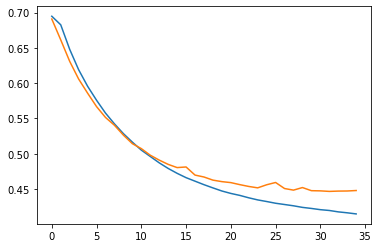

In [25]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [27]:
m1 = keras.Sequential()
m1.add(keras.layers.Embedding(500, 16, input_length=(100))) # 길이정보제시
m1.add(keras.layers.SimpleRNN(8))
m1.add(keras.layers.Dense(1, activation='sigmoid'))
ot = keras.optimizers.RMSprop(learning_rate=1e-4) #1e-4?
m1.compile(optimizer=ot, loss='binary_crossentropy', metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_emd.h5',
                                       save_best_only=True)
e_stopping = keras.callbacks.EarlyStopping(patience=3,
                                           restore_best_weights=True)
hy1 = m1.fit(s_t_x,t_y,epochs=100, batch_size=64, validation_data=(s_v_x,v_y), 
           callbacks=[ck_p, e_stopping])

Epoch 1/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6644 - accuracy: 0.5996 - val_loss: 0.6326 - val_accuracy: 0.6544
Epoch 2/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6041 - accuracy: 0.7012 - val_loss: 0.5881 - val_accuracy: 0.7182
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5727 - accuracy: 0.7379 - val_loss: 0.5667 - val_accuracy: 0.7536
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5536 - accuracy: 0.7550 - val_loss: 0.5520 - val_accuracy: 0.7530
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5395 - accuracy: 0.7632 - val_loss: 0.5416 - val_accuracy: 0.7540
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5265 - accuracy: 0.7738 - val_loss: 0.5294 - val_accuracy: 0.7722
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5140 - accuracy: 0.7799 - val_loss: 0.5333 - val_accuracy:

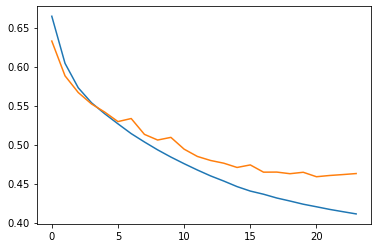

In [28]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])

In [29]:
(x_data,y_data),(tt_x,tt_y) = load_data(num_words = 500)
t_x,v_x,t_y,v_y = train_test_split(x_data,y_data,test_size=0.2, random_state=42)

In [30]:
s_t_x = pad_sequences(t_x, maxlen = 100)
s_v_x = pad_sequences(v_x, maxlen = 100)

In [31]:
m2 = keras.Sequential()
m2.add(keras.layers.Embedding(500, 16, input_length=100)) # 전처리층
m2.add(keras.layers.LSTM(8,dropout=0.3)) # 학습층 일반적으로 30퍼센트 드롭
m2.add(keras.layers.Dense(1, activation='sigmoid'))
ot = keras.optimizers.RMSprop(learning_rate=1e-4) #1e-4?
m2.compile(optimizer=ot, loss='binary_crossentropy', metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_LSTM.h5',
                                       save_best_only=True)
e_stopping = keras.callbacks.EarlyStopping(patience=3,
                                           restore_best_weights=True)
hy2 = m2.fit(s_t_x,t_y,epochs=100, batch_size=64, validation_data=(s_v_x,v_y), 
           callbacks=[ck_p, e_stopping])

Epoch 1/100
313/313 [==============================] - 9s 23ms/step - loss: 0.6927 - accuracy: 0.5224 - val_loss: 0.6920 - val_accuracy: 0.5546
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6904 - accuracy: 0.5861 - val_loss: 0.6889 - val_accuracy: 0.6024
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6854 - accuracy: 0.6319 - val_loss: 0.6816 - val_accuracy: 0.6406
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6674 - accuracy: 0.6374 - val_loss: 0.6427 - val_accuracy: 0.6690
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6072 - accuracy: 0.7174 - val_loss: 0.5897 - val_accuracy: 0.7398
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5765 - accuracy: 0.7437 - val_loss: 0.5681 - val_accuracy: 0.7484
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5599 - accuracy: 0.7549 - val_loss: 0.5504 - val_accuracy:

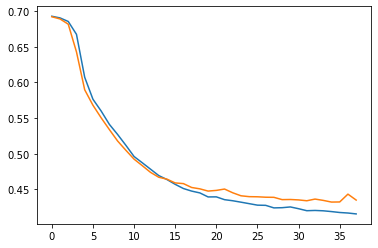

In [32]:
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])

In [ ]:
m3 = keras.Sequential()
m3.add(keras.layers.Embedding(500, 16, input_length=100)) # 전처리층
m3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True)) # 시퀀시얼 하게 보낸다.
m3.add(keras.layers.LSTM(8,dropout=0.3))
m3.add(keras.layers.Dense(1, activation='sigmoid'))
ot = keras.optimizers.RMSprop(learning_rate=1e-4) #1e-4?
m3.compile(optimizer=ot, loss='binary_crossentropy', metrics='accuracy')
ck_p = keras.callbacks.ModelCheckpoint('Ex2_LSTM_2.h5',
                                       save_best_only=True)
e_stopping = keras.callbacks.EarlyStopping(patience=3,
                                           restore_best_weights=True)
hy3 = m3.fit(s_t_x,t_y,epochs=100, batch_size=64, validation_data=(s_v_x,v_y), 
           callbacks=[ck_p, e_stopping])

In [ ]:
m4 = keras.Sequential()
m4.add(keras.layers.Embedding(500, 16, input_length=100)) # 전처리층
m4.add(keras.layers.GRU(8,dropout=0.3))
m4.add(keras.layers.Dense(1, activation='sigmoid'))